In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [470]:
class LinearReg:

    def __init__(self , epoch , LearningRate):
        self.b = -10
        self.m = -10
        self.epoch = epoch
        self.lr = LearningRate
        self.history = {'m':[] , 'b':[]}

    def fit(self , x , y):
        y = np.ravel(y)
        x = np.ravel(x)
        n = len(y)
        for i in range(self.epoch):
            slope_b = -2*(np.sum(y - x*self.m - self.b))/n
            slope_m = np.sum(-2*(y - x*self.m - self.b)*x)/n
            self.b = self.b - self.lr*slope_b
            self.m = self.m - self.lr*slope_m
            self.history['m'].append(self.m)
            self.history['b'].append(self.b)
        print("intercept" ,self.b , 'coefficient ',self.m)

    def intercepft_ (self):
        print(self.b)

    def coeff_ (self):
        print(self.m)

    def predict(self , x):
        return self.m*np.ravel(x) + self.b 

In [471]:
df = pd.read_csv("study.csv")
df.head()

,x,y
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


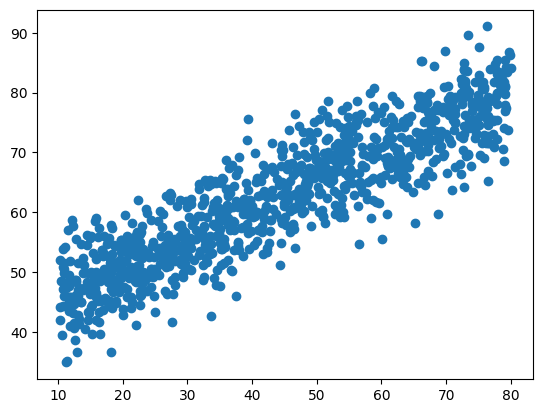

In [472]:
plt.scatter(df['x'] , df['y'])
plt.show()

In [473]:
x_train , x_test , y_train , y_test = train_test_split(df[['x']] , df[['y']] , test_size = 0.2 , random_state = 2)

In [474]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [475]:
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [476]:
Sk_LR = LinearRegression()
Sk_LR.fit(x_train_scale , y_train)

LinearRegression()

In [477]:
Sk_LR.coef_ , Sk_LR.intercept_

(array([[9.95919182]]), array([62.71758523]))

In [478]:
y_pred = Sk_LR.predict(x_test_scale)
r2_score(y_test , y_pred)

0.807793073382109

In [479]:
lr2 = LinearReg(250 , 0.01)
lr2.fit(x_train_scale , y_train)

intercept 62.251829324778505 coefficient  9.831353254054346


In [480]:
y_pred2 = lr2.predict(x_test)

In [481]:
r2_score(y_test , y_pred2)

-1819.5282608847021

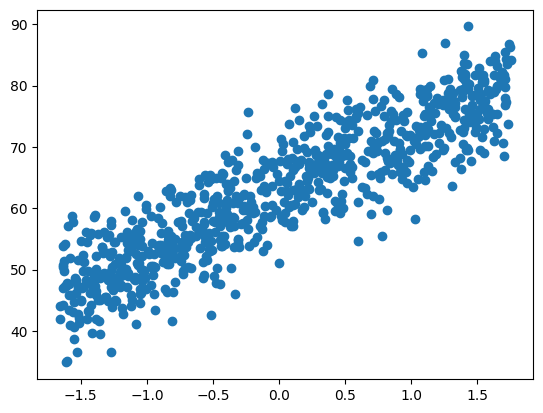

In [482]:
plt.scatter(x_train_scale , y_train)

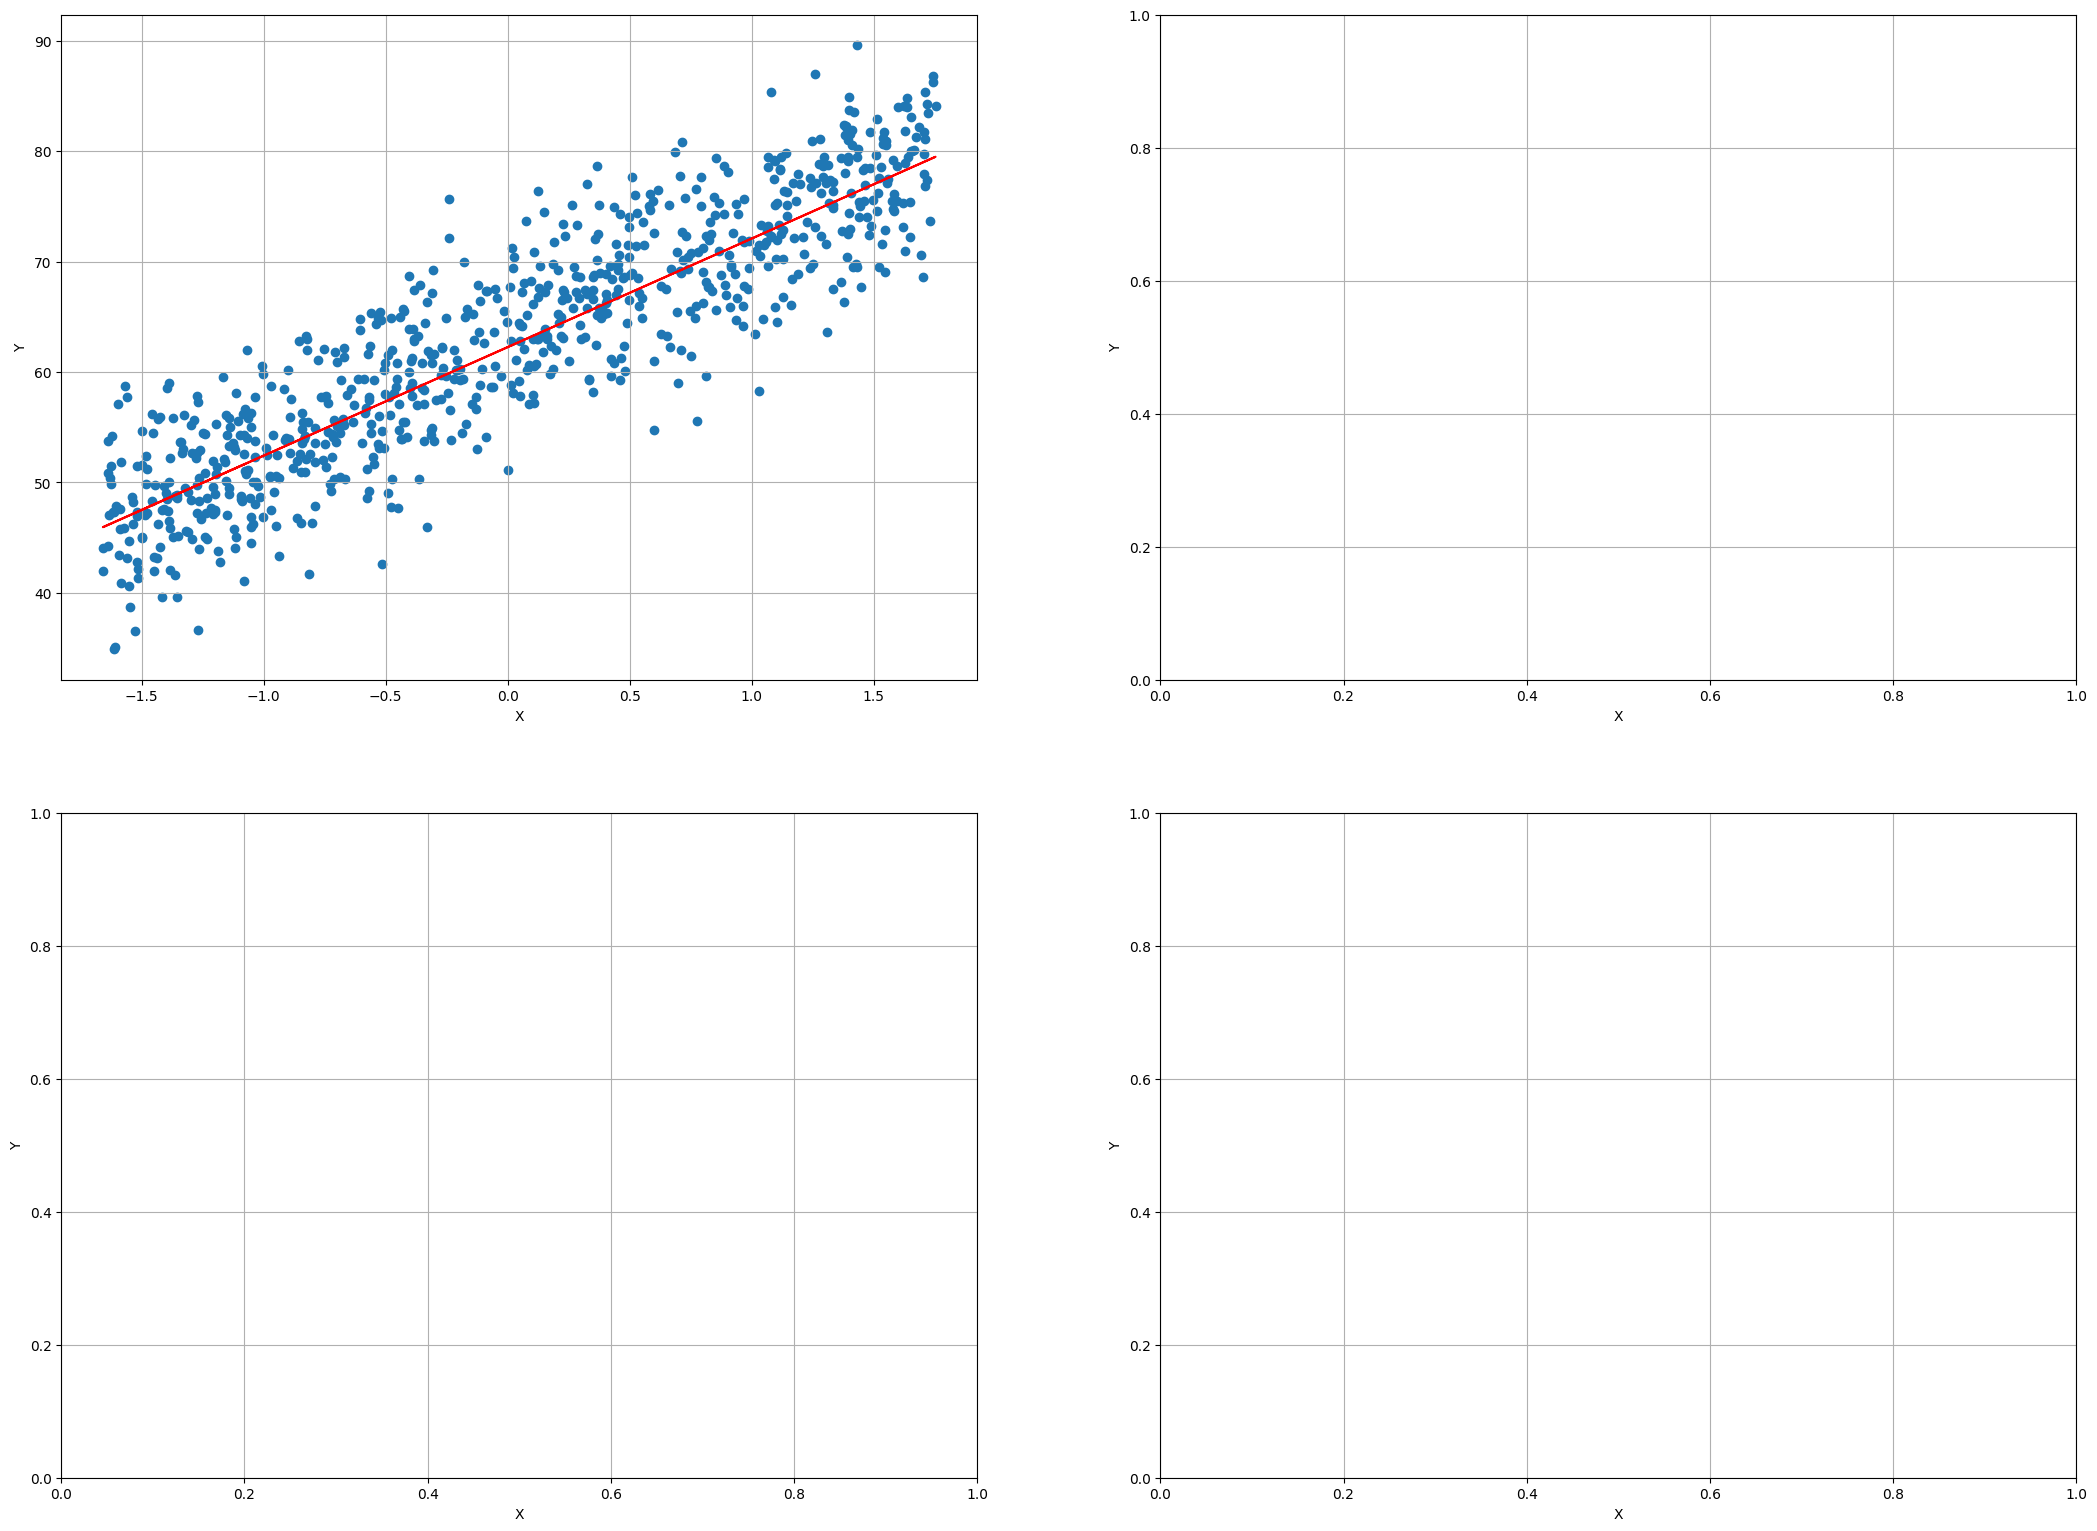

In [483]:
fig , ax = plt.subplots(2 , 2 , figsize = (26 , 19))
ax[0,0].scatter(x_train_scale , y_train)
ax[0,0].set_xlabel('X')
ax[0,0].set_ylabel('Y')

ax[0,0].grid()
ax[0,0].plot(x_train_scale , lr2.m*x_train_scale + lr2.b , 'r-')

ax[0,1].set_xlabel('X')
ax[0,1].set_ylabel('Y')
ax[0,1].grid()

ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')
ax[1,0].grid()

ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')
ax[1,1].grid()

plt.show()

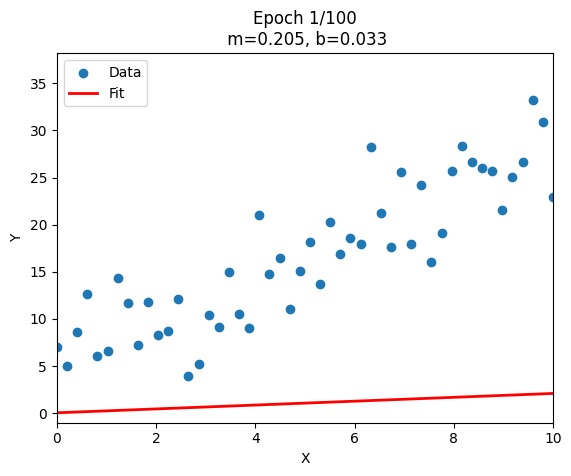

In [484]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the Linear Regression class
class LinearReg:
    def __init__(self, epochs, lr):
        self.b = 0.0
        self.m = 0.0
        self.epochs = epochs
        self.lr = lr
        # Store history for animation
        self.history = {'m': [], 'b': []}

    def fit(self, x, y):
        X = np.ravel(x)
        Y = np.ravel(y)
        N = len(Y)
        for epoch in range(self.epochs):
            # Compute gradients
            error = Y - (self.m * X + self.b)
            slope_b = -2 * np.sum(error) / N
            slope_m = -2 * np.sum(error * X) / N
            # Update parameters
            self.b -= self.lr * slope_b
            self.m -= self.lr * slope_m
            # Save history
            self.history['m'].append(self.m)
            self.history['b'].append(self.b)
        return self

    def predict(self, x):
        return self.m * np.ravel(x) + self.b


# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y_true = 2.5 * X + 5
Y = y_true + np.random.normal(scale=4, size=X.shape)

# Initialize and fit
epochs = 100
lr = 0.001
model = LinearReg(epochs, lr)
model.fit(X, Y)

# Set up the plot
fig, ax = plt.subplots()
ax.scatter(X, Y, label='Data')
line, = ax.plot([], [], 'r-', linewidth=2, label='Fit')
ax.set_xlim(0, 10)
ax.set_ylim(Y.min() - 5, Y.max() + 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

# Animation function
def update(frame):
    m = model.history['m'][frame]
    b = model.history['b'][frame]
    y_line = m * X + b
    line.set_data(X, y_line)
    ax.set_title(f'Epoch {frame+1}/{epochs}\n m={m:.3f}, b={b:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=epochs, interval=100, blit=True)

# To save the animation, uncomment below if ffmpeg or imagemagick is installed:
# anim.save('linear_regression.mp4', writer='ffmpeg')

plt.show()